In [1]:
import requests
import pandas as pd
import json
import numpy as np
req=requests.get("https://api.covid19api.com/live/country/united-states").json()
covid=pd.DataFrame(req)

In [2]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           5949 non-null   object
 1   Country      5949 non-null   object
 2   CountryCode  5949 non-null   object
 3   Province     5949 non-null   object
 4   City         5949 non-null   object
 5   CityCode     5949 non-null   object
 6   Lat          5949 non-null   object
 7   Lon          5949 non-null   object
 8   Confirmed    5949 non-null   int64 
 9   Deaths       5949 non-null   int64 
 10  Recovered    5949 non-null   int64 
 11  Active       5949 non-null   int64 
 12  Date         5949 non-null   object
dtypes: int64(4), object(9)
memory usage: 604.3+ KB


In [3]:
covid.describe()

,Confirmed,Deaths,Recovered,Active
count,5.949000e+03,5949.000000,5949.0,5.949000e+03
mean,6.862580e+05,11579.335519,0.0,6.746786e+05
std,8.362966e+05,14459.734603,0.0,8.222832e+05
min,0.000000e+00,0.000000,0.0,0.000000e+00
25%,1.400210e+05,2078.000000,0.0,1.377490e+05
50%,4.618930e+05,7274.000000,0.0,4.533410e+05
75%,8.380790e+05,13940.000000,0.0,8.260510e+05
max,4.774445e+06,69994.000000,0.0,4.704451e+06


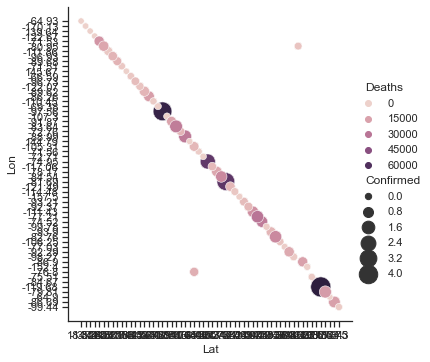

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.relplot(data=covid,x="Lat",y="Lon",hue="Deaths",size="Confirmed",sizes=(40,400))

In [6]:
covid['Lat'][0]

'18.35'

In [7]:
covid['Lat'] = covid['Lat'].astype('float16')
covid['Lon'] = covid['Lon'].astype('float16')

In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949 entries, 0 to 5948
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5949 non-null   object 
 1   Country      5949 non-null   object 
 2   CountryCode  5949 non-null   object 
 3   Province     5949 non-null   object 
 4   City         5949 non-null   object 
 5   CityCode     5949 non-null   object 
 6   Lat          5949 non-null   float16
 7   Lon          5949 non-null   float16
 8   Confirmed    5949 non-null   int64  
 9   Deaths       5949 non-null   int64  
 10  Recovered    5949 non-null   int64  
 11  Active       5949 non-null   int64  
 12  Date         5949 non-null   object 
dtypes: float16(2), int64(4), object(7)
memory usage: 534.6+ KB


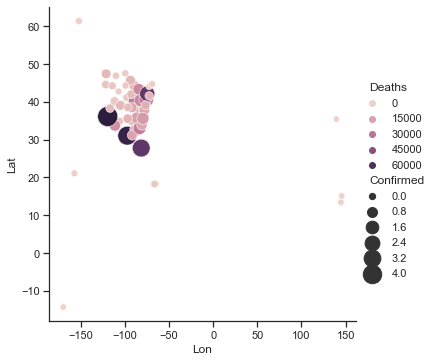

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
sns.relplot(data=covid,x="Lon",y="Lat",hue="Deaths",size="Confirmed",sizes=(40,400))

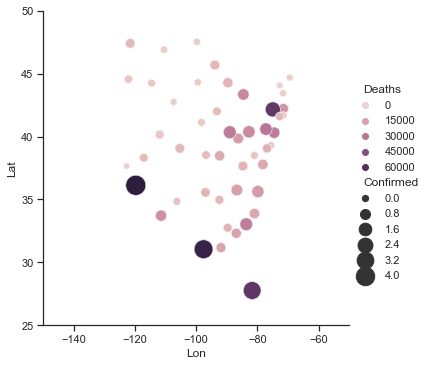

In [10]:
figs=sns.relplot(data=covid,x="Lon",y="Lat", hue="Deaths", size="Confirmed",sizes=(40,400)).set(ylim=(25,50),xlim=(-150,-50))

In [11]:
req=requests.get("https://www.communitybenefitinsight.org/api/get_hospitals.php").json()
hospitals=pd.DataFrame(req)
hospitals.head()

,hospital_id,hospital_org_id,ein,name,name2,name3,street_address,city,state,zip_code,...,fips_state_and_county_code,hospital_bed_count,chrch_affl_f,urban_location_f,children_hospital_f,memb_counc_teach_hosps_f,medicare_provider_number,county,hospital_bed_size,updated_dt
0,1,1,630307951,Mizell Memorial Hospital,,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,...,01039,99,N,N,N,N,010007,Covington County,<100 beds,"October 1, 2021"
1,2,2,630578923,St Vincents East,,St Vincents East,50 Medical Park Drive East,Birmingham,AL,35235,...,01073,362,N,Y,N,Y,010011,Jefferson County,>299 beds,"October 1, 2021"
2,3,3,630312913,Shelby Baptist Medical Center,,Shelby Baptist Medical Center,1000 First Street North,Alabaster,AL,35007,...,01117,252,N,Y,N,N,010016,Shelby County,100-299 beds,"October 1, 2021"
3,4,4,630459034,Callahan Eye Foundation Hosp,,Callahan Eye Foundation Hosp,1720 University Boulevard,Birmingham,AL,35233,...,01073,106,N,Y,N,Y,010018,Jefferson County,100-299 beds,"October 1, 2021"
4,5,5,581973570,Cherokee Medical Center,,Cherokee Medical Center,100 Northwood Drive,Centre,AL,35960,...,01019,60,N,N,N,N,010022,Cherokee County,<100 beds,"October 1, 2021"


In [12]:
hospitals['state_county']=hospitals['state']+'_'+hospitals['county']
hospitals.head()

,hospital_id,hospital_org_id,ein,name,name2,name3,street_address,city,state,zip_code,...,hospital_bed_count,chrch_affl_f,urban_location_f,children_hospital_f,memb_counc_teach_hosps_f,medicare_provider_number,county,hospital_bed_size,updated_dt,state_county
0,1,1,630307951,Mizell Memorial Hospital,,Mizell Memorial Hospital,702 Main Street,Opp,AL,36462,...,99,N,N,N,N,010007,Covington County,<100 beds,"October 1, 2021",AL_Covington County
1,2,2,630578923,St Vincents East,,St Vincents East,50 Medical Park Drive East,Birmingham,AL,35235,...,362,N,Y,N,Y,010011,Jefferson County,>299 beds,"October 1, 2021",AL_Jefferson County
2,3,3,630312913,Shelby Baptist Medical Center,,Shelby Baptist Medical Center,1000 First Street North,Alabaster,AL,35007,...,252,N,Y,N,N,010016,Shelby County,100-299 beds,"October 1, 2021",AL_Shelby County
3,4,4,630459034,Callahan Eye Foundation Hosp,,Callahan Eye Foundation Hosp,1720 University Boulevard,Birmingham,AL,35233,...,106,N,Y,N,Y,010018,Jefferson County,100-299 beds,"October 1, 2021",AL_Jefferson County
4,5,5,581973570,Cherokee Medical Center,,Cherokee Medical Center,100 Northwood Drive,Centre,AL,35960,...,60,N,N,N,N,010022,Cherokee County,<100 beds,"October 1, 2021",AL_Cherokee County


In [13]:
HospitalInfoPerCounty=hospitals.groupby(['state_county'], as_index=False)['hospital_bed_count'].agg('sum')
HospitalInfoPerCounty.head()

,state_county,hospital_bed_count
0,AK_Anchorage Municipality,401
1,AK_Fairbanks North Star Borough,162
2,AK_Kenai Peninsula Borough,49622
3,AK_Ketchikan Gateway Borough,25
4,AK_Kodiak Island Borough,25


In [14]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hospital_id                 3380 non-null   object
 1   hospital_org_id             3380 non-null   object
 2   ein                         3380 non-null   object
 3   name                        3380 non-null   object
 4   name2                       3380 non-null   object
 5   name3                       3380 non-null   object
 6   street_address              3380 non-null   object
 7   city                        3380 non-null   object
 8   state                       3380 non-null   object
 9   zip_code                    3380 non-null   object
 10  american_association_id     3380 non-null   object
 11  fips_state_and_county_code  3380 non-null   object
 12  hospital_bed_count          3380 non-null   object
 13  chrch_affl_f                3380 non-null   obje

In [15]:
hospitals['hospital_bed_count'] = hospitals['hospital_bed_count'].astype('float16')
HospitalInfoPerCounty=hospitals.groupby(['state_county'], as_index=False)['hospital_bed_count'].agg('sum')
HospitalInfoPerCounty.head()

,state_county,hospital_bed_count
0,AK_Anchorage Municipality,401.0
1,AK_Fairbanks North Star Borough,162.0
2,AK_Kenai Peninsula Borough,77.0
3,AK_Ketchikan Gateway Borough,25.0
4,AK_Kodiak Island Borough,25.0


In [16]:
HospitalInfoPerCounty['state_county']=HospitalInfoPerCounty['state_county'].str.replace(' County','')
HospitalInfoPerCounty.head(5)

,state_county,hospital_bed_count
0,AK_Anchorage Municipality,401.0
1,AK_Fairbanks North Star Borough,162.0
2,AK_Kenai Peninsula Borough,77.0
3,AK_Ketchikan Gateway Borough,25.0
4,AK_Kodiak Island Borough,25.0


In [17]:
req=requests.get("https://webhooks.mongodb-stitch.com/api/client/v2.0/app/covid-19-qppza/service/REST-API/incoming_webhook/us_only?min_date=2021-01-15T00:00:00.000Z&max_date=2021-01-15T00:00:00.000Z").json()
covid=pd.DataFrame(req)

In [18]:
covid.head()

,_id,uid,country_iso2,country_iso3,country_code,fips,county,state,country,combined_name,population,loc,date,confirmed,deaths,confirmed_daily,deaths_daily
0,6163bebb19db28efd843218d,84001001,US,USA,840,1001.0,Autauga,Alabama,US,"Autauga, Alabama, US",55869.0,"{'type': 'Point', 'coordinates': [-86.6441, 32...",2021-01-15T00:00:00.000Z,5103,55,28,0
1,6163bebb19db28efd8432400,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,"Baldwin, Alabama, US",223234.0,"{'type': 'Point', 'coordinates': [-87.7221, 30...",2021-01-15T00:00:00.000Z,16002,179,161,2
2,6163bebb19db28efd8432673,84001005,US,USA,840,1005.0,Barbour,Alabama,US,"Barbour, Alabama, US",24686.0,"{'type': 'Point', 'coordinates': [-85.3871, 31...",2021-01-15T00:00:00.000Z,1712,36,16,0
3,6163bebb19db28efd84328e6,84001007,US,USA,840,1007.0,Bibb,Alabama,US,"Bibb, Alabama, US",22394.0,"{'type': 'Point', 'coordinates': [-87.1251, 32...",2021-01-15T00:00:00.000Z,2130,47,17,0
4,6163bebb19db28efd8432b59,84001009,US,USA,840,1009.0,Blount,Alabama,US,"Blount, Alabama, US",57826.0,"{'type': 'Point', 'coordinates': [-86.5679, 33...",2021-01-15T00:00:00.000Z,5264,83,45,3


In [19]:
us_state_to_abbrev = {
"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR", "California": "CA",
"Colorado": "CO","Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA",
"Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS",
"Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA",
"Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO","Montana": "MT",
"Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM",
"New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH",
"Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI",
"South Carolina": "SC","South Dakota": "SD","Tennessee": "TN","Texas": "TX",
"Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA",
"West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY",
"District of Columbia": "DC","American Samoa": "AS","Guam": "GU", "Northern Mariana Islands": "MP",
"Puerto Rico": "PR","United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI",
}
covid['state'].replace(us_state_to_abbrev, inplace=True)
covid.head(5)

,_id,uid,country_iso2,country_iso3,country_code,fips,county,state,country,combined_name,population,loc,date,confirmed,deaths,confirmed_daily,deaths_daily
0,6163bebb19db28efd843218d,84001001,US,USA,840,1001.0,Autauga,AL,US,"Autauga, Alabama, US",55869.0,"{'type': 'Point', 'coordinates': [-86.6441, 32...",2021-01-15T00:00:00.000Z,5103,55,28,0
1,6163bebb19db28efd8432400,84001003,US,USA,840,1003.0,Baldwin,AL,US,"Baldwin, Alabama, US",223234.0,"{'type': 'Point', 'coordinates': [-87.7221, 30...",2021-01-15T00:00:00.000Z,16002,179,161,2
2,6163bebb19db28efd8432673,84001005,US,USA,840,1005.0,Barbour,AL,US,"Barbour, Alabama, US",24686.0,"{'type': 'Point', 'coordinates': [-85.3871, 31...",2021-01-15T00:00:00.000Z,1712,36,16,0
3,6163bebb19db28efd84328e6,84001007,US,USA,840,1007.0,Bibb,AL,US,"Bibb, Alabama, US",22394.0,"{'type': 'Point', 'coordinates': [-87.1251, 32...",2021-01-15T00:00:00.000Z,2130,47,17,0
4,6163bebb19db28efd8432b59,84001009,US,USA,840,1009.0,Blount,AL,US,"Blount, Alabama, US",57826.0,"{'type': 'Point', 'coordinates': [-86.5679, 33...",2021-01-15T00:00:00.000Z,5264,83,45,3


In [20]:
covid['state_county']=covid['state']+'_'+covid['county']
covid.head()

,_id,uid,country_iso2,country_iso3,country_code,fips,county,state,country,combined_name,population,loc,date,confirmed,deaths,confirmed_daily,deaths_daily,state_county
0,6163bebb19db28efd843218d,84001001,US,USA,840,1001.0,Autauga,AL,US,"Autauga, Alabama, US",55869.0,"{'type': 'Point', 'coordinates': [-86.6441, 32...",2021-01-15T00:00:00.000Z,5103,55,28,0,AL_Autauga
1,6163bebb19db28efd8432400,84001003,US,USA,840,1003.0,Baldwin,AL,US,"Baldwin, Alabama, US",223234.0,"{'type': 'Point', 'coordinates': [-87.7221, 30...",2021-01-15T00:00:00.000Z,16002,179,161,2,AL_Baldwin
2,6163bebb19db28efd8432673,84001005,US,USA,840,1005.0,Barbour,AL,US,"Barbour, Alabama, US",24686.0,"{'type': 'Point', 'coordinates': [-85.3871, 31...",2021-01-15T00:00:00.000Z,1712,36,16,0,AL_Barbour
3,6163bebb19db28efd84328e6,84001007,US,USA,840,1007.0,Bibb,AL,US,"Bibb, Alabama, US",22394.0,"{'type': 'Point', 'coordinates': [-87.1251, 32...",2021-01-15T00:00:00.000Z,2130,47,17,0,AL_Bibb
4,6163bebb19db28efd8432b59,84001009,US,USA,840,1009.0,Blount,AL,US,"Blount, Alabama, US",57826.0,"{'type': 'Point', 'coordinates': [-86.5679, 33...",2021-01-15T00:00:00.000Z,5264,83,45,3,AL_Blount


In [21]:
CovidPerCounty=covid.groupby(['state_county'], as_index=False).agg({'deaths':'sum','confirmed':'sum','population':'sum','confirmed_daily':'mean','deaths_daily':'mean'})
CovidPerCounty.head(15)

,state_county,deaths,confirmed,population,confirmed_daily,deaths_daily
0,AK_Aleutians East,0,40,3337.0,1,0
1,AK_Aleutians West,0,242,5634.0,3,0
2,AK_Anchorage,129,24530,288000.0,92,0
3,AK_Bethel,12,2911,18386.0,26,0
4,AK_Bristol Bay,0,0,836.0,0,0
5,AK_Bristol Bay plus Lake and Peninsula,0,163,2428.0,1,0
6,AK_Chugach,3,241,6751.0,0,0
7,AK_Copper River,0,175,2699.0,1,0
8,AK_Denali,0,63,2097.0,0,0
9,AK_Dillingham,1,150,4916.0,1,0


In [22]:
CovidPerCounty['mortality']=CovidPerCounty['deaths']/CovidPerCounty['confirmed']
CovidPerCounty.head(5)

,state_county,deaths,confirmed,population,confirmed_daily,deaths_daily,mortality
0,AK_Aleutians East,0,40,3337.0,1,0,0.000000
1,AK_Aleutians West,0,242,5634.0,3,0,0.000000
2,AK_Anchorage,129,24530,288000.0,92,0,0.005259
3,AK_Bethel,12,2911,18386.0,26,0,0.004122
4,AK_Bristol Bay,0,0,836.0,0,0,NaN


In [29]:
CovidPerCounty['mortality'] = CovidPerCounty['mortality'].fillna(0)
CovidPerCounty.head(5)
## fill in the NaN for AK_Bristol Bay in the mortality column since if there are 0 deaths and 0 confirmed, mortality is effectively 0 

,state_county,deaths,confirmed,population,confirmed_daily,deaths_daily,mortality
0,AK_Aleutians East,0,40,3337.0,1,0,0.000000
1,AK_Aleutians West,0,242,5634.0,3,0,0.000000
2,AK_Anchorage,129,24530,288000.0,92,0,0.005259
3,AK_Bethel,12,2911,18386.0,26,0,0.004122
4,AK_Bristol Bay,0,0,836.0,0,0,0.000000


In [40]:
Hospital_Covid_PerCounty=pd.merge(HospitalInfoPerCounty,CovidPerCounty,on='state_county')
Hospital_Covid_PerCounty=Hospital_Covid_PerCounty[Hospital_Covid_PerCounty['population']>50000]
Hospital_Covid_PerCounty=Hospital_Covid_PerCounty[Hospital_Covid_PerCounty['population']<300000]
Hospital_Covid_PerCounty=Hospital_Covid_PerCounty[Hospital_Covid_PerCounty['confirmed']>10]
Hospital_Covid_PerCounty.head()

,state_county,hospital_bed_count,deaths,confirmed,population,confirmed_daily,deaths_daily,mortality
0,AL_Baldwin,232.0,179,16002,223234.0,161,2,0.011186
1,AL_Blount,65.0,83,5264,57826.0,45,3,0.015767
2,AL_Calhoun,552.0,200,10982,113605.0,119,3,0.018212
8,AL_Cullman,115.0,104,7960,83768.0,38,10,0.013065
9,AL_Elmore,69.0,101,7723,81209.0,53,0,0.013078


In [43]:
Hospital_Covid_PerCounty['people_per_bed']=Hospital_Covid_PerCounty['population']/Hospital_Covid_PerCounty['hospital_bed_count']
Hospital_Covid_PerCounty.head()

,state_county,hospital_bed_count,deaths,confirmed,population,confirmed_daily,deaths_daily,mortality,people_per_bed
0,AL_Baldwin,232.0,179,16002,223234.0,161,2,0.011186,962.215517
1,AL_Blount,65.0,83,5264,57826.0,45,3,0.015767,889.630769
2,AL_Calhoun,552.0,200,10982,113605.0,119,3,0.018212,205.806159
8,AL_Cullman,115.0,104,7960,83768.0,38,10,0.013065,728.417391
9,AL_Elmore,69.0,101,7723,81209.0,53,0,0.013078,1176.942029


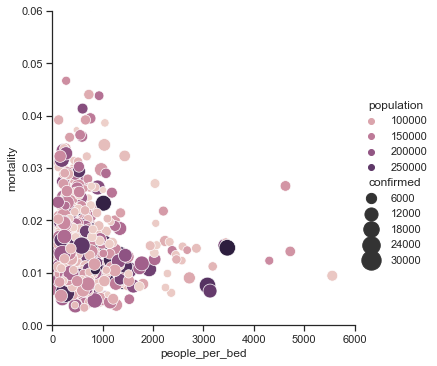

In [51]:
sns.set_theme(style="ticks")
sns.relplot(data=Hospital_Covid_PerCounty,x="people_per_bed",y="mortality",hue="population", size="confirmed",sizes=(40,400)).set(ylim=(0,0.06),xlim=(0,6000))